# Projeto Um Mal Silencioso 

![Alt](https://socgastro.org.br/novo/wp-content/uploads/2019/07/hepatite_c-1.jpg)

# Escopo do projeto

* 1 - Introdução 
* 2 - Importações dos pacotes
* 3 - Funções
* 4 - Limpeza dos dados brutos
* 5 - Leitura dos dados tratados
* 6 - Tratamento adicionais nos dados
* 7 - Visualização dos dados 
* 8 - Conclusões

# 1 - Introdução

Olá, esse projeto tem como objetivo analisar os dados de vacinação do Programa Nacional De Imunização a fim de estudar um dos mais graves problemas de saúde pública no Brasil e no mundo, as _**Hepatites Virais**_. Nele o foco foram os dados de vacinação, casos e óbitos da Hepatite A, B e C. No [README](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/README.md) desse projeto eu expliquei melhor sobre cada uma das Hepatites analisadas e o porquê ser um mal silencioso que na maior parte das vezes a pessoa infectada desconhece essa infecção o que pode levar à sérios problemas crônicos.

#### _**Visão geral de cada Hepatite analisada**_

#### Hepatite A (HAV):
* transmissão fecal-oral, por contato entre indivíduos ou por meio de água ou alimentos contaminados pelo vírus
* possui cura e existe vacina
* baixo risco de evoluir para fase crônica
* vacinação começou a ser oferecida pelo SUS em 2000 mas a vacinação ampla foi incluída no calendário de vacinação, no Brasil, em 2014 pelo Programa Nacional de Imunização promovido pelo SUS

#### Hepatite B (HBV):
* transmissão por contato sexual, transfusão sanguínea ou agulhas e objetos cortantes contaminados
* possui cura e existe vacina
* existe um risco maior de evoluir para fase crônica
* maior parte desconhecem ter a infecção
* vacinação ampla, no Brasil, começou em 1992 para crianças menores de 2 anos e está disponível até hoje no Programa Nacional de Imunizações para todas as faixas etárias

#### Hepatite C (HCV):
* transmissão pelo compartilhamento de agulhas, objetos cortantes, gestação da mãe para o filho
* possui cura mas _**NÃO possui vacina**_
* maior causa de doença crônica do fígado
* maior parte desconhecem ter a infecção

# 2 - Importações dos pacotes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from funcoes import plota_grafico, thousand_formatter, million_formatter

# 3 - Funções 

A função 'plota_gráfico' foi a função utilizada para plotar todos os gráficos analisados nesse notebook

In [2]:
help(plota_grafico)

Help on function plota_grafico in module funcoes:

plota_grafico(dados: pandas.core.frame.DataFrame, x: str, y: str, hue=None, title='', subtitle=None, xlabel=None, ylabel=None, dict_hue_palette=None, palette_sns=None, formatter_x=None, formatter_y=None, file_name=None, xlim=None, ylim=None, hue_legend=None, style='darkgrid', show=True, ax=None, color_xlabel='dimgray', color_ylabel='dimgray', color_title='black', color_sub='dimgray', color_xticks='dimgray', color_yticks='dimgray', legend=False, legend_title='', title_loc='left', kind='line', intervalo_ano=None, **kwargs)
    Função que plota um gráfico entre duas variáveis, podendo ser um 'lineplot' do seaborn, 'scatterplot' ou um 'barplot' do seaborn
    
    Parâmetros:
    
            dados : DataFrame do pandas onde estão os dados, tipo=pd.DataFrame 
            x : coluna associada ao eixo x, tipo : str
            y : coluna associada ao eixo y, tipo : str
            hue : variável associada à tonalidade, tipo : str, padrão : N

As funções 'thousand_formatter' e 'million_formatter' são funções que tem o objetivo formatarem os eixos dos gráficos

In [3]:
help(million_formatter)

Help on function million_formatter in module funcoes:

million_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Milhão, mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mi' após os valores indicando a grandeza,
    precisa ser passada como parâmetro para a função FuncFormatter do matplotlib.ticker



In [4]:
help(thousand_formatter)

Help on function thousand_formatter in module funcoes:

thousand_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Mil, mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mil' após os valores indicando a grandeza,
    precisa ser passada como parâmetro para a função FuncFormatter do matplotlib.ticker



Transformando as funções em funções do tipo 'matplotlib.ticker', pois dessa forma pode ser passada como parâmetro das funções formatadores dos eixos do 'matplotlib'

In [5]:
million_formatter = FuncFormatter(million_formatter)
thousand_formatter = FuncFormatter(thousand_formatter)

# 4 - Limpeza dos dados brutos

### Dados brutos :
[casos_hepA_por_regiao.csv](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/casos_hepA_por_regiao.csv) : arquivo csv com os dados de casos e óbitos de Hepatite A por região entre 2001 e 2006
<br>
[casos_hepB_por_regiao.csv](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/casos_hepB_por_regiao.csv) : arquivo csv com os dados de casos e óbitos de Hepatite B por região entre 2001 e 2006
<br>
[casos_hepC_por_regiao.csv](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/casos_hepC_por_regiao.csv) : arquivo csv com os dados de casos e óbitos de Hepatite C por região entre 2001 e 2006
<br>
[MonitoramentoHepatites-Norte.xls](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/MonitoramentoHepatites-Norte.xls) : arquivo xls com várias tabelas relacionadas aos casos e óbitos de Hepatites da região Norte entre 2007 e 2019
<br>
[MonitoramentoHepatites-Nordeste.xls](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/MonitoramentoHepatites-Nordeste.xls) : arquivo xls com várias tabelas relacionadas aos casos e óbitos de Hepatites da região Nordeste entre 2007 e 2019
<br>
[MonitoramentoHepatites-Sul.xls](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/MonitoramentoHepatites-Sul.xls) : arquivo xls com várias tabelas relacionadas aos casos e óbitos de Hepatites da região Sul entre 2007 e 2019
<br>
[MonitoramentoHepatites-Sudeste.xls](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/MonitoramentoHepatites-Sudeste.xls) : arquivo xls com várias tabelas relacionadas aos casos e óbitos de Hepatites da região Sudeste entre 2007 e 2019
<br>
[MonitoramentoHepatites-Centro-Oeste.xls](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/MonitoramentoHepatites-Centro-Oeste.xls) : arquivo xls com várias tabelas relacionadas aos casos e óbitos de Hepatites da região Centro-Oeste entre 2007 e 2019
<br>
[serie_2001_2020_TCU_populacao.xls](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_brutos/serie_2001_2020_TCU_populacao.xls) : arquivo xls com dados com dados da estimativa da população brasileira feita pelo IBGE entre 2001 e 2020<br>
[MonitoramentoHepatites-Brasil.xls](https://github.com/Pedro-correa-almeida/projeto_um_mal_silencioso/blob/main/dados_brutos/MonitoramentoHepatites-Brasil.xls) : arquivo xls com diversas tabelas relacionados aos dados de casos e óbitos de Hepatite no Brasil entre 2007 e 2019<br>
[casos_hepatite_2001-2006_brasil.csv](https://github.com/Pedro-correa-almeida/projeto_um_mal_silencioso/blob/main/dados_brutos/casos_hepatite_2001-2006_brasil.csv) : arquivo csv com dados de casos de Hepatite entre 2001 e 2006<br>
[serie_2001_2020_TCU_populacao.xls](https://github.com/Pedro-correa-almeida/projeto_um_mal_silencioso/blob/main/dados_brutos/serie_2001_2020_TCU_populacao.xls) : arquivo xls com dados com dados da estimativa da população brasileira feita pelo IBGE entre 2001 e 2020<br>
[cobertura_vacina_hep.csv](https://github.com/Pedro-correa-almeida/projeto_um_mal_silencioso/blob/main/dados_brutos/cobertura_vacina_hep.csv) : dados relacionados à cobertura das vacinas contra Hepatite B e Hepatite A, a fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100.<br>
[vacina_hepatite.csv](https://github.com/Pedro-correa-almeida/projeto_um_mal_silencioso/blob/main/dados_brutos/vacina_hepatite.csv) : dados relacionados aos totais de doses aplicadas das vacinas contra Hepatite B e Hepatite A

### _**Observação importante**_ : os dados relacionados à cobertura de vacinação levam em conta a população alvo da vacinação da campanha indicada e usa estimativas de nascimentos, portanto existiram anos que os dados estão acima de 100% e de acordo com a fonte dos dados existem limitações nesse cálculo são eles : 

* Valores médios elevados podem encobrir bolsões de baixa cobertura em determinados grupos populacionais, comprometendo o controle das doenças.<br>
* Imprecisões do registro de doses de vacina aplicadas, principalmente durante a realização de campanhas de vacinação.<br>
* A demanda da população não residente aos postos de vacinação, principalmente em campanhas, dificulta a avaliação da cobertura vacinal.<br>
* Imprecisões da base de dados demográficos utilizada para estimar o número de crianças com menos de um ano de idade, especialmente em anos intercensitários.<br>

### Tratamento dos dados

Essas bases de dados foram tratadas em notebooks auxiliares de acordo com o tipo dos dados a fim de deixar esse notebook focado na análise e na visualização, os notebooks auxiliares foram:

* [tratamento_casos_obitos_hep_brasil](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/notebooks/tratamento_casos_obitos_hep_brasil.ipynb)
* [tratamento_casos_por_regiao](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/notebooks/tratamento_casos_por_regiao.ipynb)
* [tratamento_vacina](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/notebooks/tratamento_vacina.ipynb)

##### Observação : eu optei por não nomear esses dados de 'limpos', e sim 'tratados', pois como existem diferenças de tempo nos registros dos dados essas bases de dados permaneceram com diversos dados nulos

### Descrição das variáveis dos dados tratados e seus registros

[casos_obitos_hep](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_tratados/casos_obitos_hep) : 
* Ano : ano correspondente entre 1994 e 2020
* virus : vírus correspondente da Hepatite(A, B ou C)
* Casos : registros entre 2001 e 2019 relacionados aos casos confirmados de Hepatite A, B e C pelo SUS
* Obitos : registros entre 2007 e 2018 relacionados aos óbitos por Hepatite A, B e C pelo SUS 
* Pop : estimativa populacional do Brasil naquele Ano
* taxa_incid_por100k : cálculo da quantidade de casos a cada 100 mil habitantes brasileiros
* taxa_obitos_por100k : cálculo da quantidade de óbitos a cada 100 mil habitantes brasileiros

[casos_obitos_por_regiao](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_tratados/casos_obitos_por_regiao) :
* Ano : ano correspondente entre 1994 e 2020
* virus : vírus correspondente da Hepatite(A, B ou C)
* Regiao : região correspondente
* Casos : registros entre 2001 e 2019 relacionados aos casos confirmados de Hepatite A, B e C pelo SUS
* Obitos : registros entre 2007 e 2018 relacionados aos óbitos por Hepatite A, B e C pelo SUS 
* Pop : estimativa populacional da região naquele Ano correspondentes
* taxa_incid_por100k : cálculo da quantidade de casos a cada 100 mil habitantes daquela região correspondentes
* taxa_obitos_por100k : cálculo da quantidade de óbitos a cada 100 mil habitantes daquela região correspondentes

[vacinas_hep](https://github.com/PedroHCAlmeida/projeto_um_mal_silencioso/blob/main/dados_tratados/vacinas_hep) :
* Cobertura_vacina_100Hab : dados de vacinação contra a Hepatite B desde 1992 até 2020 e contra Hepatite A entre 2014 e 2020 pelo Programa Nacional de Imunizações
* Doses_totais : total de doses aplicadas contra a Hepatite B desde 1992 até 2020 e contra Hepatite A entre 2000 e 2020 pelo Programa Nacional de Imunizações<br>
Obs : todos os dados relacionados à Hepatite C são nulos pois **não existe vacina**

# 5 - Leitura dos dados tratados

In [6]:
casos = pd.read_csv('../dados_tratados/casos_obitos_hep')
vacinas = pd.read_csv('../dados_tratados/vacinas_hep')
dados_reg = pd.read_csv('../dados_tratados/casos_obitos_por_regiao')

# 6 - Tratamento adicionais nos dados

In [7]:
dados_reg.head()

,Ano,virus,Regiao,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,Norte,2868.0,NaN,13245084.0,21.653317,NaN
1,2001,B,Norte,820.0,NaN,13245084.0,6.190976,NaN
2,2001,C,Norte,287.0,NaN,13245084.0,2.166842,NaN
3,2002,A,Norte,2755.0,NaN,13504599.0,20.400458,NaN
4,2002,B,Norte,1032.0,NaN,13504599.0,7.641841,NaN


In [8]:
casos.head()

,Ano,virus,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,21011.0,NaN,172385826.0,12.188357,NaN
1,2001,B,8344.0,NaN,172385826.0,4.840305,NaN
2,2001,C,6713.0,NaN,172385826.0,3.894172,NaN
3,2002,A,14468.0,NaN,174632960.0,8.284805,NaN
4,2002,B,8841.0,NaN,174632960.0,5.062618,NaN


In [9]:
vacinas.head()

,Ano,virus,Cobertura_vacina_100Hab,Doses_totais
0,1994,B,8.85,2297035.0
1,1995,B,10.50,2521993.0
2,1996,B,16.50,2989325.0
3,1997,B,5.79,2002570.0
4,1998,B,12.63,8747762.0


In [10]:
#Juntando os dados da tabela casos com a tabela de vacinas
dados = pd.merge(casos, vacinas, on=['Ano', 'virus'], how='outer')

#Criando a coluna letalidade para calcular a porcentagem de mortes em relação aos casos
dados['letalidade'] = dados['Obitos'] * 100/dados['Casos']
dados.head()

,Ano,virus,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k,Cobertura_vacina_100Hab,Doses_totais,letalidade
0,2001,A,21011.0,NaN,172385826.0,12.188357,NaN,NaN,41062.0,NaN
1,2001,B,8344.0,NaN,172385826.0,4.840305,NaN,91.88,35206019.0,NaN
2,2001,C,6713.0,NaN,172385826.0,3.894172,NaN,NaN,NaN,NaN
3,2002,A,14468.0,NaN,174632960.0,8.284805,NaN,NaN,58788.0,NaN
4,2002,B,8841.0,NaN,174632960.0,5.062618,NaN,91.47,30906741.0,NaN


# 7 - Visualização dos dados

In [11]:
#defininfo estilo dos gráficos
sns.set_style('darkgrid')

### Qual a Hepatite Viral mais comum no Brasil atualmente?

Em um primeiro momento decidi analisar os casos de cada Hepatite por ano em todo o Brasil para responder a pergunta de qual é a Hepatite viral mais comum no Brasil atualmente, para isso vamos visulizar um gráfico de linha mostrando a evolução de cada Hepatite entre os anos de 2001 e 2019.

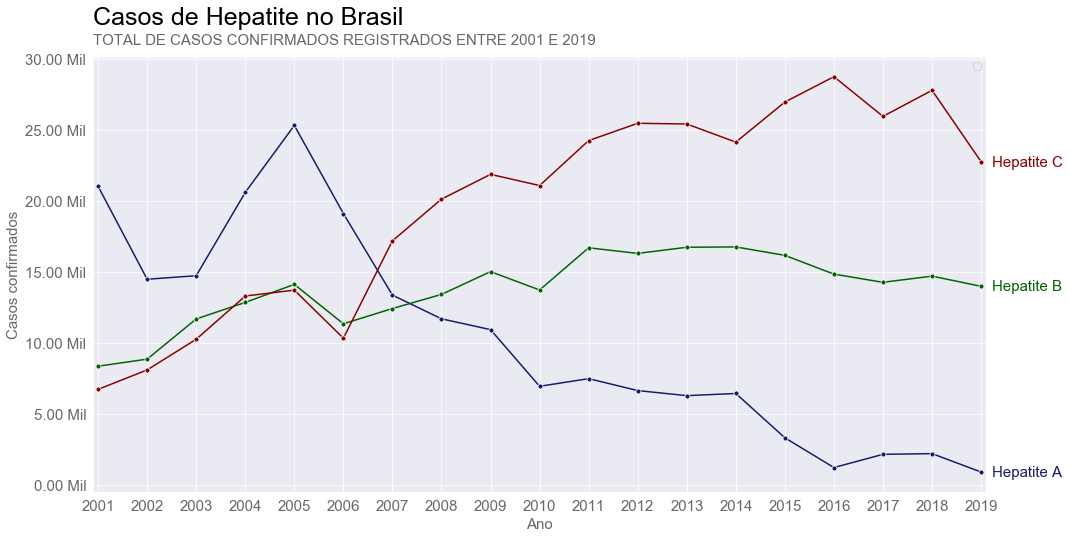

In [12]:
#Criando o dicinário com as cores de acordo com o vírus da Hepatite
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
#Chamando a função plota_grafico
plota_grafico(dados, 'Ano', 'Casos', hue='virus', title='Casos de Hepatite no Brasil',
          subtitle='TOTAL DE CASOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], formatter_y=thousand_formatter, file_name='casos_hep', xlim=[2000.9, 2019.1],
          xlabel='Ano', ylabel='Casos confirmados', marker='.', markersize=10, intervalo_ano=1)

Nota se que a Hepatite C teve um aumento muito grande nesse período, por mais que esses dados são totais e não são relativos à população, esse número foi de 6713 infectados em 2001 para um pico de 28732 em 2016, o que eu acredito é que como as pessoas, muitas vezes, desconhecem a infecção, o controle dos casos é algo difícil e o que pode ajudar é a divulgação desses dados a fim de concientizar as pessoas a sempre estarem atentas e realizando o teste rápido oferecido de graça pelo SUS.

Em relação à Hepatite B, nota-se um certo controle sem muitas oscilações, eu acredito que isso deu por meio da vacina que começou em 1992, porém para conter mais ainda o vírus a vacinação precisa continuar e as pessoas não podem deixar de levar seu filhos para vacinar.

Sobre os casos de Hepatite A percebe-se que a partir de 2006 sofreram uma queda muito grande, o que leva a crer que a transmissão do vírus foi contida, a fim de achar o motivo procurei por dados sobre saneamento básico no Brasil nesse período, pois a transmissão do vírus pode ocorrer através de água contaminada, porém não obtive acesso à dados relacionados nessa época, entretanto encontrei um artigo científico publicado em 2014 sobre [Política pública de saneamento básico: uma análise da recente experiência brasileira
](https://www.scielo.br/j/sausoc/a/gn7vpPFZYBHq6s6JVtHCHbw/?lang=pt#), e o que me chamou atenção foram os dados sobre 'Participação relativa dos repasses orçamentários para o saneamento em relação ao PIB Brasileiro (1996-2009)':

![Alt](../images/grafico_saneamento.png)

Percebe-se que realmente no período de 2005 e 2009 os repasses orçamentários para o saneamento aumentaram e se percebermos os casos de Hepatite A começaram a sofre uma grande queda a partir de 2006 , ou seja, eu acredito que o investimento em saneamento básico pode ter tido uma grande influência no combate à Hepatite A no Brasil. 

### Qual a Hepatite que mais mata pessoas por ano?

Continuando a análise vamos visualizar os dados relacionados aos óbitos por cada Hepatite, dessa vez os dados obtidos correspondem aos anos entre 2007 e 2018.

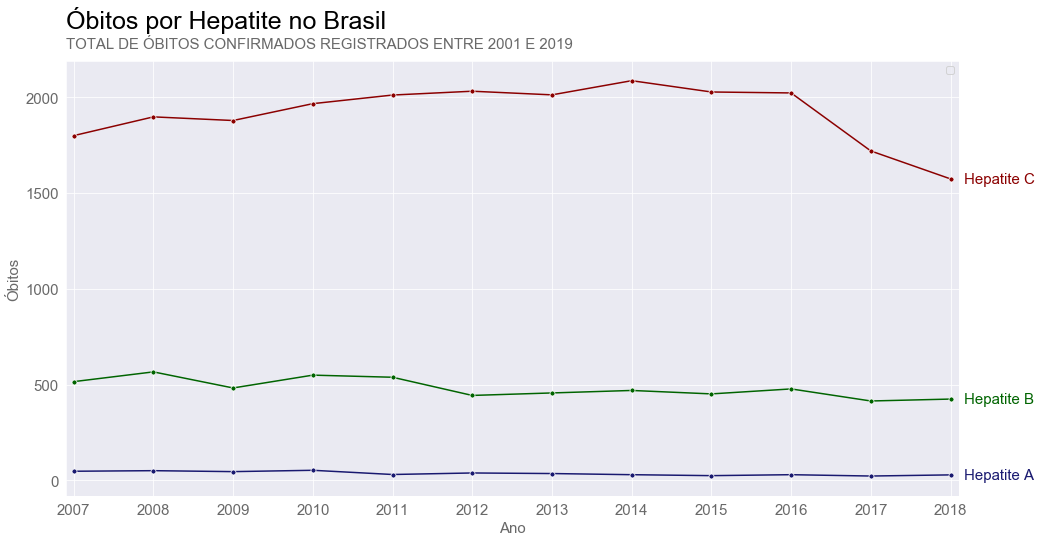

In [13]:
#Chamando a função plota_grafico
plota_grafico(dados.dropna(subset=['Obitos']), 'Ano', 'Obitos', hue='virus', title='Óbitos por Hepatite no Brasil',
             subtitle='TOTAL DE ÓBITOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Óbitos',
             hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='obitos_hep', xlim=[2006.9, 2018.1], marker='.', markersize=10,intervalo_ano=1)

Conforme o gráfico percebe que a Hepatite C é a que **mais mata** por ano nesse período, e aqui fica evidente o risco dessa doença onde existem anos que a quantidade de óbitos passa os 2000 por ano, ou seja, uma doença que **existe cura** mas as pessoas não sabem desse risco e não tem noção do seu perigo por não apresentar sintomas tão agressivos.

Além disso vale ressaltar que a Hepatite B também tem um alto número de óbitos por ano e não devemos subestimar essas doenças por mais que esteja mais sobre controle

A única boa notícia boa aparenta ser que, nesse período, as mortes por Hepatite A estão bem contidas, o que eu acredito ser a junção de um investimento em saneamento com um Programa de Imunização contra a doença.

### Qual a letalidade média de cada Hepatite?

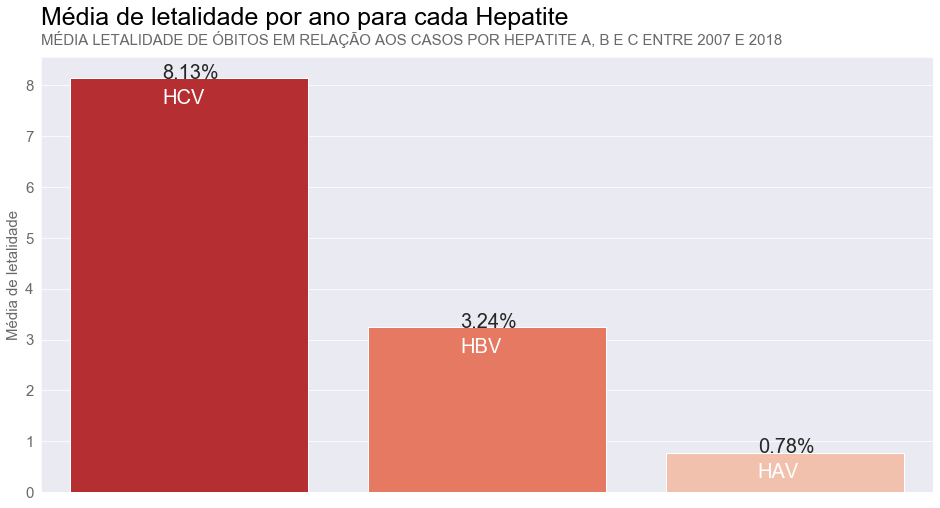

In [14]:
palette_let_casos = sns.color_palette('Reds_r', 3)
dados_let_hep = dados.dropna(subset=['letalidade']).groupby('virus').agg({'letalidade':'mean'}).reset_index().sort_values('letalidade', ascending=False)

fig, ax = plt.subplots(figsize=(16,8))
plota_grafico(dados_let_hep, 'virus', 'letalidade', kind='bar', palette_sns=palette_let_casos, ax=ax, show=False, title='Média de letalidade por ano para cada Hepatite',
              subtitle='MÉDIA LETALIDADE DE ÓBITOS EM RELAÇÃO AOS CASOS POR HEPATITE A, B E C ENTRE 2007 E 2018', ylabel='Média de letalidade')
ax.set_xticklabels('')

for i,hep in zip(range(0,5),dados_let_hep['virus'].unique()):
    plt.text(i-0.09,dados_let_hep[dados_let_hep['virus'] == hep]['letalidade'], str(round(dados_let_hep[dados_let_hep['virus'] == hep]['letalidade'].values[0], 2)) + '%', fontsize=20)
    plt.text(i-0.09,dados_let_hep[dados_let_hep['virus'] == hep]['letalidade']-0.5, 'H'+hep+'V', fontsize=20, color='white')

Aqui fica evidente a letalidade da Hepatite C, com uma média de _**8.13%**_, ou seja, 8.13% das pessoas que tiveram infecção por esse vírus morreram, e o que mais preocupa, é a Hepatite que _**mais cresce atualmente**_ no Brasil, por isso é preciso reforçar essa concientização e a realização dos testes rápidos frequentemente.

### Quando começou a vacinação ampla contra a Hepatite B?

Agora vamos analisar os dados sobre vacinação de Hepatite A e B para tentar fazer um paralelo com os dados analisados de casos e óbitos

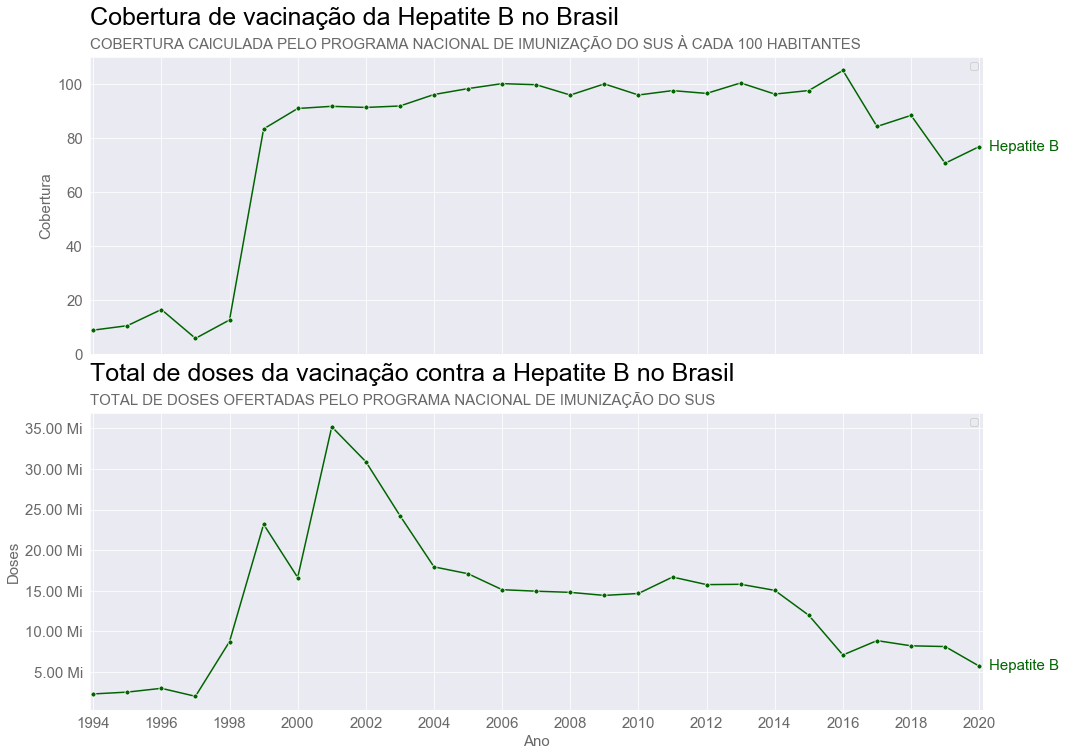

In [15]:
fig, axn = plt.subplots(2,1, figsize=(16,12), sharex=True)

dados_hep_b = dados.query('virus == "B"')

plota_grafico(dados_hep_b, 'Ano', 'Cobertura_vacina_100Hab', hue='virus', dict_hue_palette={'B':'#006400'}, hue_legend=['Hepatite B'], xlim=[1993.9,2020.1],
             title='Cobertura de vacinação da Hepatite B no Brasil', subtitle='COBERTURA CAlCULADA PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS À CADA 100 HABITANTES', 
              xlabel='Ano', ylabel='Cobertura', marker='.', markersize=10,  ylim=[0,110], intervalo_ano=2, ax=axn[0], show=False)

plota_grafico(dados_hep_b, 'Ano', 'Doses_totais',  hue='virus', dict_hue_palette={'B':'#006400'}, hue_legend=['Hepatite B'], xlim=[1993.9,2020.1],
             title='Total de doses da vacinação contra a Hepatite B no Brasil', subtitle='TOTAL DE DOSES OFERTADAS PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS', 
              xlabel='Ano', ylabel='Doses', marker='.', markersize=10, formatter_y=million_formatter, intervalo_ano=2, ax=axn[1], show=False)

plt.show()

Observando os dados tanto de cobertura de vacinação e de doses aplicadas percebe se que realmente houve um movimento do SUS ali no final dos anos 1990 e início dos anos 2000 para conter a doença, e nessa época, provavelmente, foi quando começou realmente a vacinação ampla contra a doença, sendo que a cobertura chegou ali nos 100% previstos(lembrando que como esse cálculo é aproximado pela população é normal ter algum ano que superou os 100% como aconteceu em 2016), poré, nos anos mais recentes parece que a cobertura teve uma queda grande chegando ali perto dos 70%, o que eu acredito que seja a desinformação sobre essas vacinas por parte da população.

Outro fator que vale salientar é que provavelmente as doses aplicadas diminuiram em relação ao seu pois nos primeiros anos de vacina com certeza a população-alvo era maior, pois antes disso o SUS não oferecia essa vacina amplamente como começou a oferecer.

### Quando começou a vacinação ampla contra a Hepatite A?

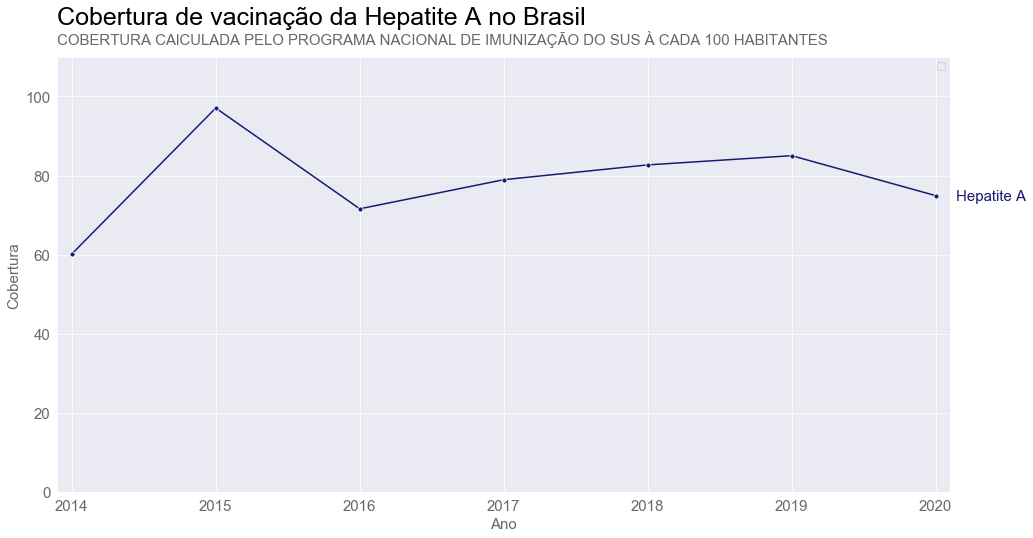

In [16]:
plota_grafico(dados.query('virus == "A"'), 'Ano', 'Cobertura_vacina_100Hab', hue='virus', dict_hue_palette={'A':'#191970'}, hue_legend=['Hepatite A'], xlim=[2013.9,2020.1],
             title='Cobertura de vacinação da Hepatite A no Brasil', subtitle='COBERTURA CAlCULADA PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS À CADA 100 HABITANTES', xlabel='Ano', ylabel='Cobertura',  
              marker='.', markersize=10, ylim=[0,110], intervalo_ano=1)

Agora com o gráfico sobre a cobertura de vacinação da Hepatite A nota que relamente os dados são apenas de 2014 pra frente e que a cobertura da vacinação começou muito bem e o SUS está conseguindo fazer o seu papel em relação à essa vacina.

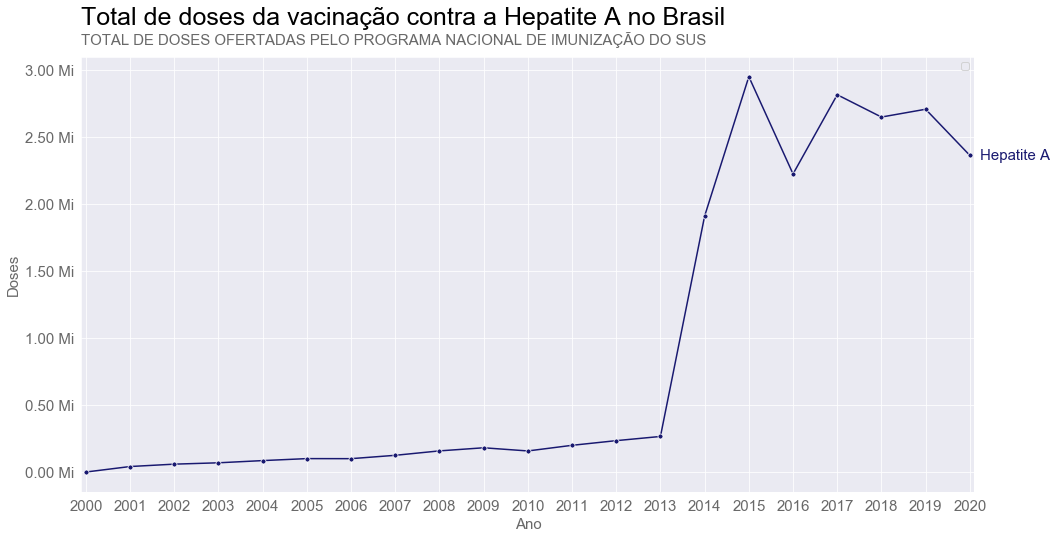

In [17]:
plota_grafico(dados.query('virus == "A"'), 'Ano', 'Doses_totais', hue='virus', dict_hue_palette={'A':'#191970'}, hue_legend=['Hepatite A'], xlim=[1999.9,2020.1],
             title='Total de doses da vacinação contra a Hepatite A no Brasil', subtitle='TOTAL DE DOSES OFERTADAS PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS', xlabel='Ano', ylabel='Doses',  
              marker='.', markersize=10, formatter_y=million_formatter, intervalo_ano=1)

Ao contrário dos dados de cobertura, existem registros de doses aplicadas contra a Hepatite A desde 2000, provavelmente o que acontecia era algumas campanhas específicas para grupos específicos, e conseguimos ver exatamente quando o Programa Nacional de imunização incluiu essa vacina no calendário pois fica claro o pico ali em 2014 e a diferença que o SUS faz conseguindo vacinar milhões de pessoas.

### Como se comporta a taxa de incidência, relativa à população, de cada Hepatite nos últimos anos?

Para responder essa pergunta vamos analisar essa taxa ao longo do tempo por Hepatite

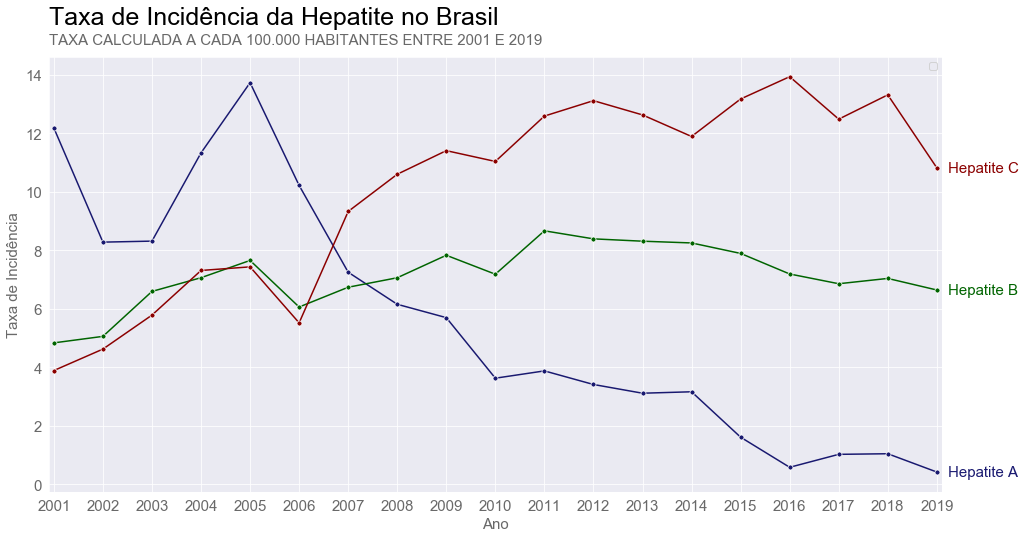

In [18]:
plota_grafico(dados, 'Ano', 'taxa_incid_por100k', hue='virus', title='Taxa de Incidência da Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          xlabel='Ano', ylabel='Taxa de Incidência',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_indic', xlim=[2000.9, 2019.1], marker='.', markersize=10,intervalo_ano=1)

Olhando os dados relativos à população percebe se que se aproxima muito dos dados totais com a Hepatite C sendo a mais comum desde 2007 até 2019 e atingindo altos números se comparado aos outros vírus, e conseguimos confirmar que realmente os casos de Hepatite A vem baixando bastante nesse século e pode ser devido ao investimento de saneamento básico no Brasil.

### Como se comporta a taxa de óbitos, relativa à população, de cada Hepatite nos últimos anos?

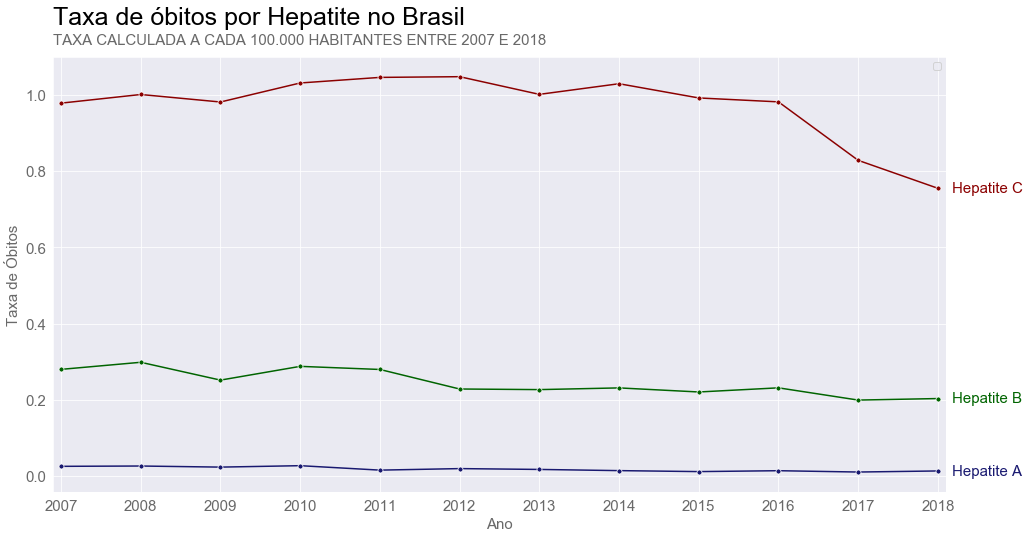

In [19]:
plota_grafico(dados.dropna(subset=['taxa_obitos_por100k']), 'Ano', 'taxa_obitos_por100k', hue='virus', title='Taxa de óbitos por Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2007 E 2018',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Taxa de Óbitos',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos', xlim=[2006.9, 2018.1], marker='.', markersize=10,intervalo_ano=1)

Observando agora os dados de óbitos percebe se que realmente a Hepatite C, em alguns anos, foi responsável por mais de 1 morte à cada 100 mil habitantes, ressaltanto aqui que _**é um doença que existe cura**_ e mesmo assim tem essa taxa de óbitos, ou seja, é necessário cuidado, não podemos subestimar o vírus.

### Qual região brasileira mais apresenta casos e óbitos de Hepatite por ano?

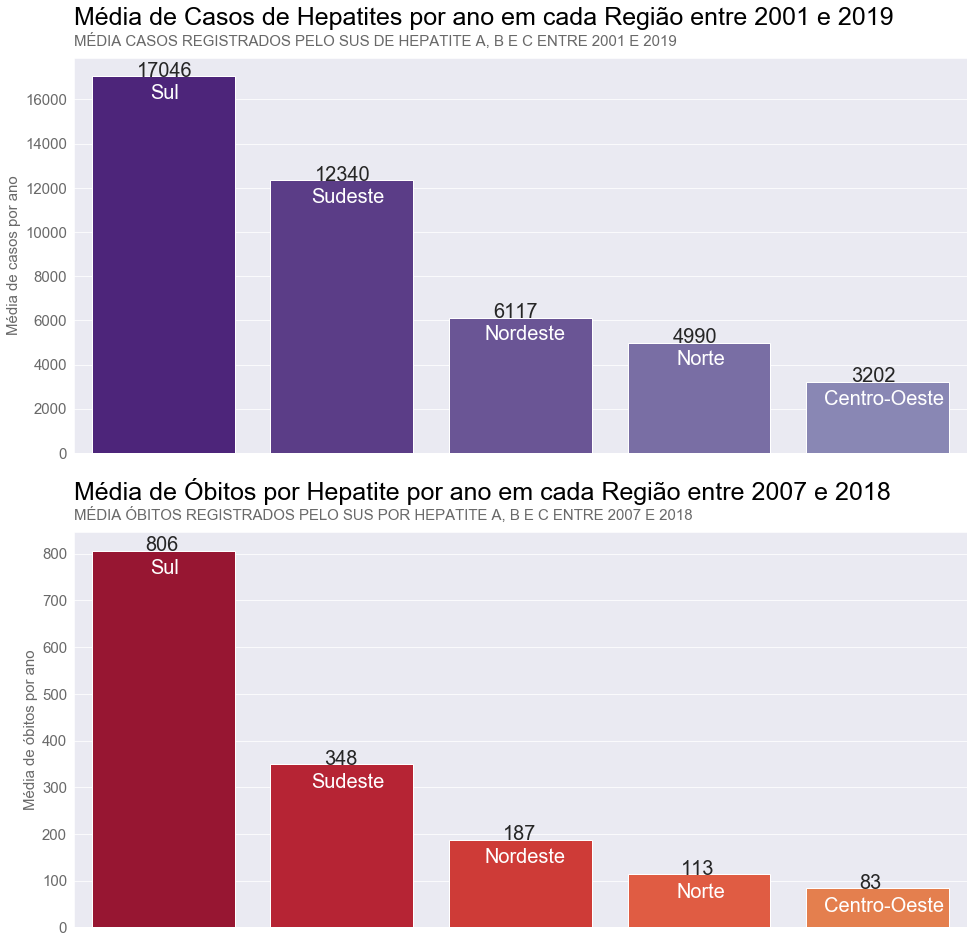

In [20]:
palette_reg_casos = sns.color_palette('Purples_r', 12)
dados_casos_reg = dados_reg.groupby(['Ano', 'Regiao']).agg({'Casos':'sum'}).reset_index().\
                     groupby('Regiao').agg({'Casos':'mean'}).sort_values('Casos',ascending=False).reset_index()

fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_grafico(dados_casos_reg, 'Regiao', 'Casos', kind='bar', palette_sns=palette_reg_casos, ax=ax[0], show=False, title='Média de Casos de Hepatites por ano em cada Região entre 2001 e 2019',
              subtitle='MÉDIA CASOS REGISTRADOS PELO SUS DE HEPATITE A, B E C ENTRE 2001 E 2019', ylabel='Média de casos por ano')
ax[0].set_xticklabels('')

for i,reg in zip(range(0,5),dados_casos_reg['Regiao'].unique()):
    plt.text(i-0.15,dados_casos_reg[dados_casos_reg['Regiao'] == reg]['Casos']+1, str(int(dados_casos_reg[dados_casos_reg['Regiao'] == reg]['Casos'].values[0])), fontsize=20)
    plt.text(i-(len(reg)/40),dados_casos_reg[dados_casos_reg['Regiao'] == reg]['Casos']-1000, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_obitos_reg = dados_reg.groupby(['Ano', 'Regiao']).agg({'Obitos':'sum'}).reset_index().\
                     groupby('Regiao').agg({'Obitos':'mean'}).sort_values('Obitos',ascending=False).reset_index()
    
plota_grafico(dados_obitos_reg, 'Regiao', 'Obitos', kind='bar', 
              palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Média de Óbitos por Hepatite por ano em cada Região entre 2007 e 2018',
              subtitle='MÉDIA ÓBITOS REGISTRADOS PELO SUS POR HEPATITE A, B E C ENTRE 2007 E 2018', ylabel='Média de óbitos por ano')
ax[1].set_xticklabels('')

for i,reg in zip(range(0,5),dados_obitos_reg['Regiao'].unique()):
    plt.text(i-0.1,dados_obitos_reg[dados_obitos_reg['Regiao'] == reg]['Obitos']+0.01, str(int(dados_obitos_reg[dados_obitos_reg['Regiao'] == reg]['Obitos'].values[0])), fontsize=20)
    plt.text(i-(len(reg)/40),dados_obitos_reg[dados_obitos_reg['Regiao'] == reg]['Obitos']-50, reg, fontsize=20, color='white')
    
plt.savefig('../images/media_casos_obitos_reg')

plt.show()

Observando agora os dados regionais absolutos vemos a diferença da região sul comparada com as outras regiões, tendo uma média de _**806 mortes**_ por ano no período de 2007 a 2018 e mais de _**17 mil casos**_ por ano no período de 2001 a 2019, números muito preocupantes, para tentar entender o porquê disso temos que ver como isso evoluiu durante o tempo e como são esses dados relativos à população levando em conta cada vírus da Hepatite.

### Como se comporta a taxa de incidência, relativa à população, de cada Hepatite em cada região nos últimos anos?

In [ ]:
fig, axn = plt.subplots(2,3, sharey=True, figsize=(25,15))

fig.suptitle('Taxa de Incidência por Hepatite em cada região do Brasil', fontsize=30, x=0.31)
fig.text(0.1, 0.93, 'TAXA CALCULADA A CADA 100.000 HABITANTES', fontsize=25, color='dimgray')
for ax, reg in zip(axn.flat,['Sul', 'Sudeste', 'Norte', 'Centro-Oeste', 'Nordeste']):
    plota_grafico(dados_reg[dados_reg['Regiao'] == reg], 'Ano', 'taxa_incid_por100k', hue='virus', subtitle=reg, color_sub='black',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], xlim=[2000.9, 2019.1],
          ylabel='Taxa de Incidência', marker='.', markersize=10, ax=ax, show=False, intervalo_ano=2)

plt.delaxes(ax= axn[1,2])
axn[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axn[1][1].set_position([0.55, 0.125, 0.228, 0.343])

plt.savefig('../images/taxa_incid_reg_ano')

plt.show()

Observando os dados ao longo do tempo, percebe se que realmente a região Sul teve um pico muito grande de Hepatite C a partir de 2008, o que provavelmente foi responsável pelos casos absolutos dessa infecção terem subidos, o que pode influenciar é falta de políticas públicas específicas nessa região e uma atenção maior das pessoas em relação à essa infecção.

Além disso me parece que as outras regiões estão conseguindo controlar melhor, a região Norte conseguiu conter o vírus da Hepatite A nesse século, mas vem enfrentando um aumento da Hepatite B, ou seja, por mais que em números absolutos a Hepatite C apresenta mais casos no Brasil todo, nas regiões Norte e Centro-Oeste a Hepatite B se destaca mais e à uma taxa de incidência maior, e na região Nordeste as duas estão com uma taxa muito próximas durante todo o período.

### Como se comporta a taxa de óbitos, relativa à população, de cada Hepatite em cada região nos últimos anos?

In [ ]:
fig, axn = plt.subplots(2,3, sharey=True, figsize=(25,15))

fig.suptitle('Taxa de Óbitos por Hepatite em cada região do Brasil', fontsize=30, x=0.30)
fig.text(0.1, 0.93, 'TAXA CALCULADA A CADA 100.000 HABITANTES', fontsize=25, color='dimgray')
for ax, reg in zip(axn.flat,['Sul', 'Sudeste', 'Norte', 'Centro-Oeste', 'Nordeste']):
    plota_grafico(dados_reg[dados_reg['Regiao'] == reg], 'Ano', 'taxa_obitos_por100k', hue='virus', subtitle=reg, color_sub='black',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos_por_reg', xlim=[2006.9, 2018.1],
          ylabel='Taxa de Obitos', marker='.', markersize=10, ax=ax, show=False, intervalo_ano=2)

plt.delaxes(ax= axn[1,2])
axn[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axn[1][1].set_position([0.55, 0.125, 0.228, 0.343])

plt.savefig('../images/taxa_obitos_reg_ano')

plt.show()

Analisando agora os dados de óbitos percebemos que em todas as regiões a _**Hepatite C é a que mais mata**_ em todas as regiões, ou seja, por mais que algumas regiões apresentam mais casos de Hepatite B do que C, fica claro o perigo do vírus HCV, que a maioria das pessoas desconhecem a infecção por não apresentar sintomas agressivos mas mesmo assim é reponsável por essa quantidade de mortes, e aqui novamente se destaca a região Sul que é a que mais sofre com esse vírus.

### Qual região brasileira apresenta maior taxa de incidência e maior taxa de óbitos médias das Hepatites?

In [ ]:
palette_reg_incid = sns.color_palette('Purples_r', 12)
dados_taxa_ind_reg = dados_reg.groupby(['Ano', 'Regiao']).agg({'taxa_incid_por100k':'sum'}).reset_index().\
                     groupby('Regiao').agg({'taxa_incid_por100k':'mean'}).sort_values('taxa_incid_por100k',ascending=False).reset_index()

fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_grafico(dados_taxa_ind_reg, 'Regiao', 'taxa_incid_por100k', kind='bar', palette_sns=palette_reg_incid, ax=ax[0], show=False, title='Taxa de incidência média de Hepatite por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', ylabel='Taxa de Incidência Média', ylim=[0,70])
ax[0].set_xticklabels('')

for i,reg in zip(range(0,5),dados_taxa_ind_reg['Regiao'].unique()):
    plt.text(i-0.15,dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k']+1, str(round(dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k']-5, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_taxa_obitos_reg = dados_reg.groupby(['Ano', 'Regiao']).agg({'taxa_obitos_por100k':'sum'}).reset_index().\
                        groupby('Regiao').agg({'taxa_obitos_por100k':'mean'}).sort_values('taxa_obitos_por100k',ascending=False).reset_index()
    
plota_grafico(dados_taxa_obitos_reg, 'Regiao', 'taxa_obitos_por100k', kind='bar', 
              palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Taxa de Óbitos média de Hepatite por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', ylabel='Taxa de Óbitos Média', ylim=[0,3.2])
ax[1].set_xticklabels('')

for i,reg in zip(range(0,5),dados_taxa_obitos_reg['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k']+0.01, str(round(dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k']-0.2, reg, fontsize=20, color='white')
    
plt.savefig('../images/taxa_incid_obitos_reg')

plt.show()

Agora agrupando esses dados de taxa de incidência e de óbitos pela média ao longo do tempo podemos expressar essa diferença através de números, ou seja, a região sul tem uma taxa de mais de 60 casos à cada 100 mil habitantes todo ano, sendo disparada a região que mais possui apresenta casos, e o que mais chama atenção é a taxa de óbitos de quase _**3 pessoas à cada 100 mil habitantes**_, enquanto a região Norte, a segunda maior, apresenta uma taxa de 0.68.

### Qual região brasileira apresenta maior taxa de incidência e maior taxa de óbitos médias da Hepatite C?

In [ ]:
palette_reg_incid = sns.color_palette('Purples_r', 12)
dados_taxa_ind_reg_c = dados_reg[dados_reg['virus'] == 'C'].groupby('Regiao').agg({'taxa_incid_por100k':'mean'}).sort_values('taxa_incid_por100k',ascending=False).reset_index()

fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_grafico(dados_taxa_ind_reg_c, 'Regiao', 'taxa_incid_por100k', kind='bar', 
              color_xticks='white', color_xlabel='white', palette_sns=palette_reg_incid, ax=ax[0], show=False, title='Taxa de incidência média de Hepatite C por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', xlabel='Região', ylabel='Taxa de Incidência Média', ylim=[0,38])

for i,reg in zip(range(0,5),dados_taxa_ind_reg_c['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k']+0.3, str(round(dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k']-2, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_taxa_obitos_reg_c = dados_reg[dados_reg['virus'] == 'C'].groupby('Regiao').agg({'taxa_obitos_por100k':'mean'}).sort_values('taxa_obitos_por100k',ascending=False).reset_index()
    
plota_grafico(dados_taxa_obitos_reg_c, 'Regiao', 'taxa_obitos_por100k', kind='bar', 
              color_xticks='white', color_xlabel='white', palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Taxa de Óbitos média de Hepatite C por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', xlabel='Região', ylabel='Taxa de Óbitos Média', ylim=[0,4])

for i,reg in zip(range(0,5),dados_taxa_obitos_reg_c['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k']+0.01, str(round(dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k']-0.3, reg, fontsize=20, color='white')

plt.savefig('../images/taxa_incid_obitos_hepC_reg')

plt.show()

Para finalizar a análise vamos focar na média das taxas de casos e óbitos apenas da Hepatite C, e aqui nota se um aumento ainda maior da taxa de óbitos da região Sul, pelo gráfico notamos que a cada 100 mil habitantes quase 4 morrem por Hepatite C por ano nessa região, um número absurdo se comparado com as outras regiões.

# 8 - Conclusões

http://www.aids.gov.br/pt-br/publico-geral/prevencao-combinada/testagem